In [9]:
from modules.dataprocessor import DataProcessorDocs
from modules.cluster import ClusterKmeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
dp = DataProcessorDocs()
file_count = 200

In [11]:
dp.set_paths([f"data/document_{i}.txt" for i in range(file_count)])
dp.generate_tfidf()

In [12]:
similarities = dp.calculate_similarities()

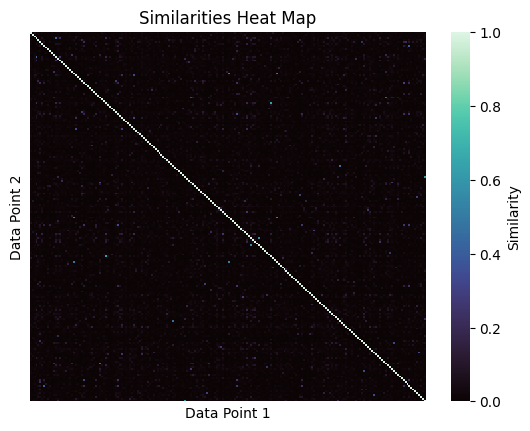

In [14]:
heatmap = sns.heatmap(similarities, cmap='mako', xticklabels=False, yticklabels=False)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Similarity')

plt.xlabel('Data Point 1')
plt.ylabel('Data Point 2')
plt.title('Similarities Heat Map')
plt.show()

As I look at this, I can guess that k-means is the most suitable algorithm for clustering this kind of data.

So I went to the first cell and imported KMeans from sklearn.

Other suitable options would be:
- DBSCAN
- Hierarchical clustering (like dendograms)

We will try them as well to see which is the most suitable and performant

In [15]:
k = 10
cluster_kmeans = ClusterKmeans(similarities, k)

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
cluster_kmeans.ordered_clusters()

{4: [0,
  24,
  31,
  39,
  50,
  69,
  82,
  86,
  94,
  96,
  97,
  103,
  106,
  107,
  117,
  119,
  126,
  127,
  131,
  142,
  143,
  147,
  152,
  166,
  171,
  173,
  177,
  181,
  182,
  187,
  198],
 8: [1,
  8,
  9,
  11,
  16,
  17,
  18,
  20,
  34,
  36,
  37,
  40,
  41,
  42,
  47,
  48,
  49,
  53,
  55,
  57,
  60,
  63,
  66,
  68,
  71,
  74,
  75,
  77,
  80,
  85,
  91,
  92,
  95,
  98,
  99,
  101,
  102,
  108,
  110,
  114,
  118,
  120,
  122,
  125,
  128,
  132,
  133,
  136,
  138,
  139,
  140,
  144,
  146,
  149,
  161,
  165,
  170,
  172,
  175,
  184,
  190,
  192,
  194],
 5: [2, 14, 28, 64, 78, 129, 134, 155, 157, 164, 186, 199],
 1: [3, 6, 13, 15, 32, 38, 45, 109, 112, 113, 121, 150, 154, 168, 176, 180],
 2: [4,
  5,
  10,
  25,
  26,
  43,
  51,
  62,
  65,
  72,
  73,
  76,
  83,
  84,
  87,
  89,
  93,
  105,
  111,
  115,
  123,
  151,
  153,
  156,
  162,
  167,
  169,
  178,
  189,
  193,
  195,
  196,
  197],
 6: [7, 27, 33, 44, 104, 137, 1

# Problem
This solution using TF-IDF/Cosine similarity has a problem. Consider these sentences:

*My schoolmates are good lads*

*My collegemates are fine people*

These two senteces are very similar, but as the "are" is a common word, and its the only term that these two sentences share, the TF-IDF score would be pretty low for these terms.

# Solution
The solution is to use one of these algorithms
- LSA (Latent Semantic Analysis)
- Word Embedding (Word2Vec, Glove)
- ConceptNet